<a href="https://colab.research.google.com/github/racoope70/daytrading-with-ml/blob/main/aapl_trading_model_comparison_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Protocol Buffer Fix (for TensorFlow)
!pip install --upgrade protobuf
!pip install protobuf==3.20.3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.2/316.2 kB 7.4 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.4
    Uninstalling protobuf-5.29.4:
      Successfully uninstalled protobuf-5.29.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.18.0 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<6.0.0dev,>=3.20.3, but you have protobuf 6.30.1 which is incompatible.
google-cloud-firestore 2.20.1 requires protobuf!=3.20.0,!=3.20.1,!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<6.0.0dev,>=3.20.2, but you have protobuf 6.30.1 which is incompatible.
google-cloud-aiplatform 1.84.0 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<6.0.0dev,>=3.20.2, but you have protobuf 6.30.1 which is incompatible.
wandb 0.19.8 requires protobuf!=4.21.0,!=5.28.0,<6,>=3.1

In [2]:
#Install TensorFlow (latest stable GPU-compatible version)
!pip install tensorflow

#Install Stable Baselines3 and Trading Libraries
!pip install stable-baselines3[extra] gymnasium gym-anytrading yfinance xgboost joblib

#Reinstall RAPIDS dependencies if needed (optional reset)
!pip install --upgrade --force-reinstall \
    dask==2024.11.2 \
    rapids-dask-dependency==24.12.0 \
    cudf-cu12==24.12.0 \
    cuml-cu12==24.12.0 \
    pylibraft-cu12==24.12.0 \
    pylibcudf-cu12==24.12.0 \
    numba==0.61.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.2/172.2 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 27.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 26.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 76.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.5/184.5 kB 19.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-c

In [1]:
import torch
import cudf
import cuml
import dask
import pandas as pd
import numpy as np
import scipy
import lightgbm as lgb
import gymnasium as gym
import stable_baselines3

#Version Checks
print("Library Versions")
print("--------------------")
print("PyTorch:", torch.__version__)
print("CUDA:", torch.version.cuda)
print("cuDF:", cudf.__version__)
print("cuML:", cuml.__version__)
print("Dask:", dask.__version__)
print("Pandas:", pd.__version__)
print("NumPy:", np.__version__)
print("SciPy:", scipy.__version__)
print("LightGBM:", lgb.__version__)
print("Gymnasium:", gym.__version__)
print("Stable Baselines3:", stable_baselines3.__version__)

#GPU Check (Torch + NVIDIA)
print("\nGPU Availability")
print("--------------------")
print("PyTorch GPU Available:", torch.cuda.is_available())
print("GPU Count:", torch.cuda.device_count())
if torch.cuda.is_available():
    print("GPU Name:", torch.cuda.get_device_name(0))


Library Versions
--------------------
PyTorch: 2.6.0+cu124
CUDA: 12.4
cuDF: 24.12.00
cuML: 24.12.00
Dask: 2024.11.2
Pandas: 2.2.3
NumPy: 2.1.3
SciPy: 1.15.2
LightGBM: 4.5.0
Gymnasium: 1.1.1
Stable Baselines3: 2.6.0

GPU Availability
--------------------
PyTorch GPU Available: True
GPU Count: 1
GPU Name: Tesla T4


In [2]:
#Core Libraries
import os
import time
import gc
import json
import pickle
from collections import defaultdict
from datetime import datetime
import sys

#Data Science Essentials
import numpy as np
import matplotlib.pyplot as plt
import numba

#Machine Learning & Data Processing
import xgboost as xgb
from xgboost import XGBClassifier
import lightgbm as lgb
import joblib
import yfinance as yf
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE

#Deep Learning
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras import mixed_precision

#RAPIDS Libraries (cuDF & cuML for GPU acceleration)
import cupy as cp

#Reinforcement Learning (Stable Baselines3)
import stable_baselines3
from stable_baselines3 import A2C, PPO, DDPG, DQN, TD3, SAC
from stable_baselines3.common.callbacks import BaseCallback
from stable_baselines3.common.logger import configure
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.noise import NormalActionNoise
from stable_baselines3.common.vec_env import DummyVecEnv, VecNormalize
from stable_baselines3.common.env_util import make_vec_env

#Gym & Trading Environments
import gym
from gym.spaces import Box
import gymnasium as gym
from gymnasium.spaces import Discrete, Box as GymBox
from gymnasium.wrappers import TimeLimit
import gym_anytrading
from gym_anytrading.envs import StocksEnv


In [3]:
#Set CUDA Paths (Ensuring GPU Utilization)
os.environ['CUDA_HOME'] = '/usr/local/cuda-11.8'
os.environ['PATH'] += ':/usr/local/cuda-11.8/bin'
os.environ['LD_LIBRARY_PATH'] += ':/usr/local/cuda-11.8/lib64'

In [4]:
!nvidia-smi

Tue Mar 25 15:57:08 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   45C    P8              9W /   70W |       2MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [116]:
#Utility Functions

def fix_dataframe_index(df):
    """
    Flattens MultiIndex columns and removes duplicated columns.
    """
    if isinstance(df.columns, pd.MultiIndex):
        df.columns = df.columns.get_level_values(0)
    return df.loc[:, ~df.columns.duplicated()]

def calculate_rsi(series, period=14):
    """
    Calculates the Relative Strength Index (RSI) for a given price series.
    """
    delta = series.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
    rs = gain / (loss + 1e-6)
    return 100 - (100 / (1 + rs))

def compute_technical_indicators(df):
    """
    Applies technical indicators including Bollinger Bands, Stochastic Oscillator,
    volatility, momentum, trend, and volume indicators.
    """
    df = df.copy()
    df = fix_dataframe_index(df)

    df['SMA_20'] = df['Close'].rolling(window=20).mean()
    df['STD_20'] = df['Close'].rolling(window=20).std()
    df['Upper_Band'] = df['SMA_20'] + 2 * df['STD_20']
    df['Lower_Band'] = df['SMA_20'] - 2 * df['STD_20']

    df['Lowest_Low'] = df['Low'].rolling(window=14).min()
    df['Highest_High'] = df['High'].rolling(window=14).max()
    denominator = (df['Highest_High'] - df['Lowest_Low']).replace(0, np.nan)
    df['Stoch'] = ((df['Close'] - df['Lowest_Low']) / denominator) * 100

    df['volatility'] = df['Close'].pct_change().rolling(20).std()
    df['ROC'] = df['Close'].pct_change(periods=10)
    df['OBV'] = (np.sign(df['Close'].diff()) * df['Volume']).fillna(0).cumsum()

    typical_price = (df['High'] + df['Low'] + df['Close']) / 3
    df['CCI'] = (typical_price - typical_price.rolling(20).mean()) / (
        0.015 * typical_price.rolling(20).std()
    )

    df['PROC'] = ((df['Close'] - df['Close'].shift(12)) / df['Close'].shift(12)) * 100
    df['Rolling_Mean_50'] = df['Close'].rolling(window=50).mean()
    df['Expanding_Mean'] = df['Close'].expanding(min_periods=1).mean()

    df.dropna(inplace=True)
    return df

def generate_trade_labels(df, lookahead=10, threshold_factor=2):
    """
    Generates binary and dynamic trade labels based on future returns
    and volatility-adjusted thresholds.
    """
    df = df.copy()
    df = fix_dataframe_index(df)

    if 'Close' not in df.columns:
        raise KeyError("'Close' column is missing. Cannot generate trade labels.")

    df['Future_Close'] = df['Close'].shift(-lookahead)
    df['Price_Change'] = (df['Future_Close'] - df['Close']) / df['Close']
    df['Target'] = np.where(df['Price_Change'] > 0.03, 1, 0)

    buy_threshold = df['volatility'] * threshold_factor
    sell_threshold = -df['volatility'] * threshold_factor

    df['Dynamic_Label'] = np.where(df['Price_Change'] > buy_threshold, 1,
                            np.where(df['Price_Change'] < sell_threshold, -1, 0))

    df.dropna(inplace=True)
    return df

In [117]:
def download_stock_data(ticker, period="720d", interval="1h", max_retries=5):
    for attempt in range(1, max_retries + 1):
        try:
            print(f"Attempt {attempt}: Downloading {ticker} stock data...")
            df_live = yf.download(ticker, period=period, interval=interval)
            if not df_live.empty:
                print("Successfully downloaded stock data!")
                df_live.reset_index(inplace=True)
                return df_live
            raise ValueError("Downloaded data is empty. Retrying...")
        except Exception as e:
            print(f"Error: {e}. Retrying in {attempt * 5} seconds...")
            time.sleep(attempt * 5)
    print("Failed to download stock data after multiple attempts.")
    return None

df_live = download_stock_data("AAPL")
if df_live is None:
    print("Using previously saved dataset instead.")
    file_path = '/content/drive/My Drive/aaplfeature_engineered_dataset.csv'
    df_live = pd.read_csv(file_path)

df = df_live.copy()

Attempt 1: Downloading AAPL stock data...


[*********************100%***********************]  1 of 1 completed

Successfully downloaded stock data!


In [ ]:
#Random Forest Trainer
def train_walk_forward(df, features, label='Target', model_path="rf_trading_model.pkl"):
    tscv = TimeSeriesSplit(n_splits=5)
    accuracy_scores = []

    for train_idx, test_idx in tscv.split(df):
        train, test = df.iloc[train_idx], df.iloc[test_idx]

        X_train = cudf.DataFrame.from_pandas(train[features]).astype(np.float32)
        y_train = cudf.Series(train[label].astype(np.float32))
        X_test = cudf.DataFrame.from_pandas(test[features]).astype(np.float32)
        y_test = cudf.Series(test[label].astype(np.float32))

        smote = SMOTE(random_state=42)
        X_resampled, y_resampled = smote.fit_resample(X_train.to_pandas(), y_train.to_pandas())
        X_train = cudf.DataFrame.from_pandas(X_resampled)
        y_train = cudf.Series(y_resampled)

        model = RandomForestClassifier(n_estimators=100)
        model.fit(X_train.to_pandas(), y_train.to_pandas())
        joblib.dump(model, model_path)

        probs = model.predict_proba(X_test.to_pandas())
        preds = (probs[:, 1] > 0.4).astype(int)
        y_test = y_test.to_pandas().to_numpy()
        acc = accuracy_score(y_test, preds)
        accuracy_scores.append(acc)

    print(f"\nAvg Accuracy Across Time Splits: {np.mean(accuracy_scores):.4f}")
    print("Random Forest Classification Report:")
    print(classification_report(y_test, preds, zero_division=0))
    print(f"Model saved to: {model_path}")
    return model

In [ ]:
#Evaluator
def evaluate_rf_model(df, features, label='Target', model_path="rf_trading_model.pkl"):
    model = joblib.load(model_path)
    X_test = df[features].astype(np.float32)
    y_test = df[label]

    probs = model.predict_proba(X_test)[:, 1]
    preds = (probs > 0.4).astype(int)

    accuracy = accuracy_score(y_test, preds)
    print(f"\nAccuracy: {accuracy:.4f}")
    print(classification_report(y_test, preds, zero_division=0))

    portfolio_value = 100000
    shares_held = 0
    values = []

    for i in range(len(df)):
        price = df["Close"].iloc[i]
        if preds[i] == 1 and shares_held == 0:
            shares_held = portfolio_value / price
            portfolio_value = 0
        elif preds[i] == 0 and shares_held > 0:
            portfolio_value = shares_held * price
            shares_held = 0
        values.append(portfolio_value + (shares_held * price))

    final_value = values[-1]
    profit_loss = final_value - 100000
    print(f"\nFinal Portfolio Value: ${final_value:,.2f} | 📈 Profit/Loss: ${profit_loss:,.2f}")
    return accuracy, final_value, profit_loss

In [ ]:
#Main Pipeline
df = download_stock_data("AAPL")
df = compute_technical_indicators(df)
df = generate_trade_labels(df)

#Inspect label distribution
print("Target label distribution:")
print(df['Target'].value_counts())

features = [
    'SMA_20', 'STD_20', 'Upper_Band', 'Lower_Band', 'Stoch', 'volatility',
    'OBV', 'CCI', 'ROC', 'PROC', 'Rolling_Mean_50', 'Expanding_Mean'
]

model_path = "rf_trading_model.pkl"
rf_model = train_walk_forward(df, features, label='Target', model_path=model_path)
accuracy, final_value, profit_loss = evaluate_rf_model(df, features, label='Target', model_path=model_path)

with open("rf_portfolio_results.json", "w") as f:
    json.dump({"final_value": final_value, "profit_loss": profit_loss}, f, indent=2)

print(f"Results saved to: rf_portfolio_results.json")

Attempt 1: Downloading AAPL stock data...


[*********************100%***********************]  1 of 1 completed


Successfully downloaded stock data!
Target label distribution:
Target
0    4672
1     282
Name: count, dtype: int64

Avg Accuracy Across Time Splits: 0.8989
Random Forest Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98       801
         1.0       0.00      0.00      0.00        24

    accuracy                           0.97       825
   macro avg       0.49      0.50      0.49       825
weighted avg       0.94      0.97      0.96       825

Model saved to: rf_trading_model.pkl

Accuracy: 0.9948
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      4672
           1       0.99      0.91      0.95       282

    accuracy                           0.99      4954
   macro avg       0.99      0.96      0.97      4954
weighted avg       0.99      0.99      0.99      4954


Final Portfolio Value: $323,310.46 | Profit/Loss: $223,310.46
Results saved to: rf_portfolio_res

In [ ]:
#Train LightGBM with SMOTE
def train_lgbm_with_balancing(df, features, label='Target', model_path="lgbm_model.pkl"):
    tscv = TimeSeriesSplit(n_splits=5)
    accuracy_scores = []

    for train_index, test_index in tscv.split(df):
        train, test = df.iloc[train_index], df.iloc[test_index]
        X_train = train[features].astype(float)
        y_train = train[label].astype(int)
        X_test = test[features].astype(float)
        y_test = test[label].astype(int)

        smote = SMOTE(sampling_strategy='auto', random_state=42)
        X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

        train_data = lgb.Dataset(X_resampled, label=y_resampled)
        test_data = lgb.Dataset(X_test, label=y_test)

        params = {
            'objective': 'binary',
            'metric': 'binary_logloss',
            'boosting_type': 'gbdt',
            'learning_rate': 0.008,
            'num_leaves': 50,
            'feature_fraction': 0.8,
            'bagging_fraction': 0.8,
            'bagging_freq': 5,
            'verbose': -1,
            'scale_pos_weight': sum(y_train == 0) / sum(y_train == 1),
            'min_child_samples': 10
        }

        model = lgb.train(
            params,
            train_data,
            valid_sets=[test_data],
            valid_names=["valid"],
            num_boost_round=2000,
            callbacks=[lgb.early_stopping(stopping_rounds=100)]
        )

        joblib.dump(model, model_path)
        y_pred = model.predict(X_test)
        y_pred_binary = (y_pred > 0.35).astype(int)
        acc = accuracy_score(y_test, y_pred_binary)
        accuracy_scores.append(acc)

    print(f"\nAvg Accuracy Across Time Splits: {np.mean(accuracy_scores):.4f}")
    print("\nLightGBM Classification Report:")
    print(classification_report(y_test, y_pred_binary))
    print(f"LightGBM model saved as {model_path}")
    return model


In [ ]:
#Evaluate LightGBM Strategy
def evaluate_lgbm(model, df, features):
    X = df[features].astype(float)
    y_pred = model.predict(X)
    y_pred_binary = (y_pred > 0.35).astype(int)

    portfolio_value = 100000
    shares_held = 0
    values = []

    for i in range(len(df)):
        price = df["Close"].iloc[i]
        if y_pred_binary[i] == 1 and shares_held == 0:
            shares_held = portfolio_value / price
            portfolio_value = 0
        elif y_pred_binary[i] == 0 and shares_held > 0:
            portfolio_value = shares_held * price
            shares_held = 0
        values.append(portfolio_value + (shares_held * price))

    final_value = values[-1]
    profit_loss = final_value - 100000
    return final_value, profit_loss

In [ ]:
#Main Execution
df = download_stock_data("AAPL")
df = compute_technical_indicators(df)
df = generate_trade_labels(df)

features = [
    'SMA_20', 'STD_20', 'Upper_Band', 'Lower_Band', 'Stoch', 'volatility',
    'OBV', 'CCI', 'ROC', 'PROC', 'Rolling_Mean_50', 'Expanding_Mean'
]

model_path = "lgbm_trading_model.pkl"
model = train_lgbm_with_balancing(df, features, label='Target', model_path=model_path)

final_value, profit_loss = evaluate_lgbm(model, df, features)

results_path = "lgbm_portfolio_results.json"
with open(results_path, "w") as f:
    json.dump({"final_value": final_value, "profit_loss": profit_loss}, f, indent=2)

import IPython.display as display
display.display(f"LGBM Portfolio results saved to: {results_path}")

Attempt 1: Downloading AAPL stock data...


[*********************100%***********************]  1 of 1 completed


Successfully downloaded stock data!
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[22]	valid's binary_logloss: 0.68951
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[425]	valid's binary_logloss: 0.0915024
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[396]	valid's binary_logloss: 0.0980509
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[274]	valid's binary_logloss: 0.230541
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[402]	valid's binary_logloss: 0.150529

Avg Accuracy Across Time Splits: 0.7903

LightGBM Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       801
           1       0.00      0.00      0.00        24

    accuracy                           0.96   

'LGBM Portfolio results saved to: lgbm_portfolio_results.json'

In [ ]:
gc.collect()
torch.cuda.empty_cache()

In [ ]:
import numpy as np
import pandas as pd
import gymnasium as gym
from gymnasium.spaces import Discrete, Box

#Function to calculate RSI
def calculate_rsi(series, period=14):
    delta = series.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
    rs = gain / (loss + 1e-6)
    return 100 - (100 / (1 + rs))

class DiscreteTradingEnv(gym.Env):
    def __init__(self, df, frame_bound=(10, 100), window_size=10, verbose=False):
        super().__init__()
        self.df = df.reset_index(drop=True)
        self.frame_bound = frame_bound
        self.window_size = window_size
        self.current_step = self.frame_bound[0]
        self.done = False
        self.verbose = verbose

        #Portfolio Variables
        self.initial_balance = 100000
        self.portfolio_value = self.initial_balance
        self.shares_held = 0
        self.last_trade_price = 0

        #Add RSI and Moving Average
        self.df['RSI'] = calculate_rsi(self.df['Close'])
        self.df['SMA'] = self.df['Close'].rolling(window=window_size).mean()

        #Define Action and Observation Space
        self.action_space = Discrete(3)  # 0 = SELL, 1 = HOLD, 2 = BUY
        self.observation_space = Box(low=-np.inf, high=np.inf, shape=(window_size + 4,), dtype=np.float32)

    def reset(self, seed=None, options=None):
        super().reset(seed=seed)
        self.current_step = self.frame_bound[0]
        self.done = False

    def reset(self, seed=None, options=None):
        super().reset(seed=seed)
        self.current_step = self.frame_bound[0]
        self.done = False
        self.portfolio_value = self.initial_balance
        self.shares_held = 0
        self.last_trade_price = 0


        #Reset Portfolio
        self.portfolio_value = self.initial_balance
        self.shares_held = 0
        self.last_trade_price = 0

        return self._next_observation(), {}

    def step(self, action):
        if self.current_step >= len(self.df) - 1:
            self.done = True
            return self._next_observation(), 0, self.done, False, {}

        self.current_step += 1
        new_price = self.df['Close'].iloc[self.current_step]

        reward = self._adjusted_reward_function(action, new_price)

        return self._next_observation(), reward, self.done, False, {}

    def _next_observation(self):
        """Returns stock prices, RSI, SMA, and portfolio status."""
        stock_prices = np.array(self.df['Close'].iloc[self.current_step - self.window_size:self.current_step], dtype=np.float32)
        rsi = self.df['RSI'].iloc[self.current_step] if not np.isnan(self.df['RSI'].iloc[self.current_step]) else 50
        sma = self.df['SMA'].iloc[self.current_step] if not np.isnan(self.df['SMA'].iloc[self.current_step]) else self.df['Close'].iloc[self.current_step]

        return np.concatenate(([self.portfolio_value], stock_prices, [self.shares_held, rsi, sma]))

    def _adjusted_reward_function(self, action, new_price):
        """Improves reward logic for better DQN trading decisions."""
        reward = 0

        #BUY ACTION: Only Buy on Dip
        if action == 2 and self.portfolio_value > 5000:
            allocated_funds = min(self.portfolio_value * 0.3, max(self.portfolio_value * 0.1, 5000))
            if self.portfolio_value >= allocated_funds:
                shares_bought = allocated_funds / new_price
                self.shares_held += shares_bought
                self.portfolio_value -= shares_bought * new_price
                self.last_trade_price = new_price

                price_change = (self.last_trade_price - new_price) / max(new_price, 1e-6)
                if price_change > 0.005:
                    reward += price_change * 100
                else:
                    reward -= 3

        #SELL ACTION: Encourages Profitable Selling
        elif action == 0 and self.shares_held > 0:
            sell_value = self.shares_held * new_price
            profit_percent = (new_price - self.last_trade_price) / max(self.last_trade_price, 1e-6)

            if profit_percent > 0.02:
                reward = profit_percent * 300
            elif profit_percent > 0.005:
                reward = profit_percent * 50
            else:
                reward = -10

            self.portfolio_value += sell_value
            self.shares_held = 0
            self.last_trade_price = 0

        #HOLD ACTION: Penalize Holding Too Long
        elif action == 1:
            unrealized_profit = (new_price - self.last_trade_price) * self.shares_held
            reward = np.tanh(unrealized_profit / self.initial_balance) * 10
            if self.shares_held > 0 and unrealized_profit < 0:
                reward -= 5

        return reward


In [ ]:
class ContinuousTradingEnv(gym.Env):
    def __init__(self, df, frame_bound=(10, 100), window_size=10, verbose=False):
        super().__init__()
        self.df = df.reset_index(drop=True)
        self.frame_bound = frame_bound
        self.window_size = window_size
        self.verbose = verbose

        self.current_step = self.frame_bound[0]
        self.max_steps = frame_bound[1] - frame_bound[0]

        #Features
        self.features = [
            'Close', 'SMA_20', 'STD_20', 'Upper_Band', 'Lower_Band', 'Stoch', 'volatility',
            'OBV', 'CCI', 'ROC', 'PROC', 'Rolling_Mean_50', 'Expanding_Mean'
        ]

        #Spaces
        self.action_space = Box(low=-1.0, high=1.0, shape=(1,), dtype=np.float32)
        self.observation_space = Box(low=0, high=1, shape=(len(self.features) + 2,), dtype=np.float32)

        #Portfolio
        self.initial_balance = 100000
        self.reset_portfolio()

    def reset_portfolio(self):
        self.portfolio_value = self.initial_balance
        self.shares_held = 0
        self.total_reward = 0

    def reset(self, seed=None, options=None):
        super().reset(seed=seed)
        self.current_step = self.frame_bound[0]
        self.reset_portfolio()
        return self._next_observation(), {}

    def _next_observation(self):
        current_data = self.df[self.features].iloc[self.current_step]
        max_vals = self.df[self.features].max()
        norm_features = current_data / max_vals.replace(0, 1)

        balance_norm = self.portfolio_value / self.initial_balance
        shares_norm = self.shares_held / 1000  # normalize

        obs = np.concatenate(([balance_norm, shares_norm], norm_features.values)).astype(np.float32)
        return obs

    def step(self, action):
        terminated = self.current_step >= len(self.df) - 1
        truncated = (self.current_step - self.frame_bound[0]) >= self.max_steps
        done = terminated or truncated

        if done:
            return self._next_observation(), 0.0, terminated, truncated, {}

        self.current_step += 1
        price = self.df['Close'].iloc[self.current_step]
        prev_price = self.df['Close'].iloc[self.current_step - 1]

        if isinstance(action, (np.ndarray, list)):
          action = float(np.clip(action[0], -1, 1))
        else:
          action = float(np.clip(action, -1, 1))

        trade_size = action * self.portfolio_value * 0.1
        shares = abs(trade_size) / max(price, 1e-3)
        reward = 0

        #Buy
        if action > 0 and self.portfolio_value >= shares * price:
            self.shares_held += shares
            self.portfolio_value -= shares * price

        #Sell
        elif action < 0 and self.shares_held > 0:
            shares_sold = min(shares, self.shares_held)
            self.portfolio_value += shares_sold * price
            self.shares_held -= shares_sold

            profit = (price - prev_price) * shares_sold
            reward = profit / self.initial_balance * 100

        #Penalty
        reward -= 0.001 * self.shares_held
        self.total_reward += reward

        return self._next_observation(), reward, terminated, truncated, {
            "portfolio_value": self.portfolio_value,
            "step": self.current_step,
            "shares_held": self.shares_held,
            "price": price
        }

    def render(self):
        print(f"Step: {self.current_step} | Portfolio: ${self.portfolio_value:.2f} | Shares Held: {self.shares_held:.2f}")


In [ ]:
from stable_baselines3 import DQN
import torch

#Create Environment
env = DiscreteTradingEnv(df=df, frame_bound=(10, len(df)), window_size=10)

#Define DQN Model
dqn_model = DQN(
    "MlpPolicy",
    env,
    learning_rate=0.0007,  # Increased learning rate
    buffer_size=50000,
    learning_starts=1000,
    batch_size=32,  # Smaller batch for more frequent updates
    target_update_interval=100,  # Lower target update interval
    exploration_fraction=0.5,  # Increased exploration
    exploration_final_eps=0.02,
    train_freq=1,
    gamma=0.99,
    tau=0.9,
    policy_kwargs={"net_arch": [256, 256]},
    verbose=1,
    device="cuda" if torch.cuda.is_available() else "cpu"
)

#Train Model
dqn_model.learn(total_timesteps=100000)

#Save Model
dqn_model.save("dqn_trading_model")


Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 4.94e+03  |
|    ep_rew_mean      | -1.39e+04 |
|    exploration_rate | 0.612     |
| time/               |           |
|    episodes         | 4         |
|    fps              | 295       |
|    time_elapsed     | 66        |
|    total_timesteps  | 19776     |
| train/              |           |
|    learning_rate    | 0.0007    |
|    loss             | 214       |
|    n_updates        | 18775     |
-----------------------------------
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 4.94e+03  |
|    ep_rew_mean      | -1.36e+04 |
|    exploration_rate | 0.225     |
| time/               |           |
|    episodes         | 8         |
|    fps              | 295       |
|    time_elapsed     | 133       |
|    total_timesteps  | 39552     |
| tra

In [ ]:
def evaluate_dqn(model, env, num_steps=100):
    print("Starting evaluation...")

    try:
        obs, _ = env.reset()
        print("Environment reset.")

        action_history = []
        portfolio_values = []

        for step in range(num_steps):
            print(f"Step {step}")

            # Predict action
            action, _ = model.predict(obs, deterministic=True)
            print(f"Predicted Action: {action}")

            # Take step in environment
            obs, reward, done, _, _ = env.step(action)
            print(f"Reward: {reward}, Done: {done}")

            action_history.append(action)
            portfolio_values.append(env.portfolio_value)
            print(f"Portfolio Value: {env.portfolio_value}")

            if done:
                print(f"Episode ended at step {step}, resetting environment.")
                obs, _ = env.reset()

        print("\nDQN Trading Results:")
        if action_history:
            print(f"Actions Taken: {set(int(a) for a in action_history)}")
            print(f"Final Portfolio Value: ${portfolio_values[-1]:.2f}")
        else:
            print("No actions were recorded.")

        return action_history, portfolio_values, final_value, profit_loss

    except Exception as e:
        print(f"Error during evaluation: {e}")
        return [], []
print("About to evaluate model...")
evaluate_dqn(dqn_model, env, num_steps=5)
print("Evaluation done.")


About to evaluate model...
Starting evaluation...
Environment reset.
Step 0
Predicted Action: 1
Reward: 0.0, Done: False
Portfolio Value: 100000
Step 1
Predicted Action: 1
Reward: 0.0, Done: False
Portfolio Value: 100000
Step 2
Predicted Action: 1
Reward: 0.0, Done: False
Portfolio Value: 100000
Step 3
Predicted Action: 1
Reward: 0.0, Done: False
Portfolio Value: 100000
Step 4
Predicted Action: 1
Reward: 0.0, Done: False
Portfolio Value: 100000

DQN Trading Results:
Actions Taken: {1}
Final Portfolio Value: $100000.00
Evaluation done.


In [ ]:
#Save
results_path = "DQN_portfolio_results.json"
with open(results_path, "w") as f:
    json.dump({"final_value": final_value, "profit_loss": profit_loss}, f, indent=2)

import IPython.display as display
display.display(f"DQN Portfolio results saved to: {results_path}")

'DQN Portfolio results saved to: DQN_portfolio_results.json'

In [ ]:
gc.collect()
torch.cuda.empty_cache()

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import random
from collections import deque
import time

#Check GPU availability
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")
if torch.cuda.is_available():
    print(f"GPU: {torch.cuda.get_device_name(0)}")
else:
    print("GPU not available — running on CPU")

#Q-Network definition
class QNetwork(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(QNetwork, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, output_dim)
        )

    def forward(self, x):
        return self.model(x)

#Deep SARSA Agent
class DeepSARSAAgent:
    def __init__(self, env, alpha=1e-3, gamma=0.99, epsilon=1.0, epsilon_decay=0.999, min_epsilon=0.01):
        self.env = env
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.epsilon_decay = epsilon_decay
        self.min_epsilon = min_epsilon

        obs_shape = env.observation_space.shape
        self.state_dim = np.prod(obs_shape)
        self.action_dim = env.action_space.n

        self.q_net = QNetwork(self.state_dim, self.action_dim).to(device)
        self.optimizer = optim.Adam(self.q_net.parameters(), lr=self.alpha)
        self.criterion = nn.MSELoss()

        #Confirm model is on GPU
        print("Model device:", next(self.q_net.parameters()).device)

    def choose_action(self, state):
        state_tensor = torch.FloatTensor(state).to(device)
        if np.random.rand() < self.epsilon:
            return self.env.action_space.sample()
        with torch.no_grad():
            q_values = self.q_net(state_tensor)
        return torch.argmax(q_values).item()

    def train(self, num_episodes=1000):
        for episode in range(num_episodes):
            state, _ = self.env.reset()
            state = state.flatten()
            state_tensor = torch.FloatTensor(state).to(device)
            action = self.choose_action(state)

            total_reward = 0

            for step in range(1000):
                next_state, reward, done, _, _ = self.env.step(action)
                next_state = next_state.flatten()
                next_state_tensor = torch.FloatTensor(next_state).to(device)
                next_action = self.choose_action(next_state)

                #Reward shaping
                reward = np.tanh(reward * 0.1)
                if action == 2: reward += 0.2
                if action == 0 and reward < 0: reward -= 0.1
                if action == 1: reward += 0.05 * step / 1000

                reward_tensor = torch.FloatTensor([reward]).to(device)

                #SARSA Update
                self.q_net.train()
                q_val = self.q_net(state_tensor)[action]
                with torch.no_grad():
                    next_q_val = self.q_net(next_state_tensor)[next_action]
                    target = reward_tensor + self.gamma * next_q_val

                #Shape fix for MSE
                loss = self.criterion(q_val.unsqueeze(0), target)

                self.optimizer.zero_grad()
                loss.backward()
                self.optimizer.step()

                state_tensor = next_state_tensor
                action = next_action
                total_reward += reward

                if done:
                    break

            self.epsilon = max(self.min_epsilon, self.epsilon * self.epsilon_decay)

            if episode % 10 == 0:
                print(f"Episode {episode}, Total Reward: {total_reward:.2f}")

        print("\nDeep SARSA Training Complete!")

    def evaluate(self, num_episodes=100):
        total_rewards = []
        action_counts = {"SELL": 0, "HOLD": 0, "BUY": 0}
        self.q_net.eval()

        for episode in range(num_episodes):
            state, _ = self.env.reset()
            state = state.flatten()
            state_tensor = torch.FloatTensor(state).to(device)
            total_reward = 0

            for step in range(1000):
                with torch.no_grad():
                    action = torch.argmax(self.q_net(state_tensor)).item()
                next_state, reward, done, _, _ = self.env.step(action)
                next_state = next_state.flatten()
                state_tensor = torch.FloatTensor(next_state).to(device)
                total_reward += reward

                if action == 0: action_counts["SELL"] += 1
                elif action == 1: action_counts["HOLD"] += 1
                else: action_counts["BUY"] += 1

                if done:
                    break

            total_rewards.append(total_reward)
            print(f"Episode {episode+1}/{num_episodes}, Reward: {total_reward:.2f}")

        avg_reward = np.mean(total_rewards)
        print(f"\nAverage Test Reward: {avg_reward:.2f}")
        print("\nAction Distribution:")
        print(f"SELL: {action_counts['SELL']}")
        print(f"HOLD: {action_counts['HOLD']}")
        print(f"BUY: {action_counts['BUY']}")

        if action_counts["SELL"] > action_counts["BUY"] * 5:
            print("Warning: Too much selling! Adjust rewards or policy.")


Using device: cuda
GPU: Tesla T4


In [ ]:
# Create environment
env_discrete_sarsa = DiscreteTradingEnv(df=df, frame_bound=(10, len(df)), window_size=10)

# Instantiate Deep SARSA Agent
sarsa_agent = DeepSARSAAgent(env_discrete_sarsa)

# Train for small batch first to verify speed
start = time.time()
sarsa_agent.train(num_episodes=10)
print(f"Training time for 10 episodes: {time.time() - start:.2f} sec")


Model device: cuda:0
Episode 0, Total Reward: -166.72

Deep SARSA Training Complete!
Training time for 10 episodes: 29.55 sec


In [ ]:
def evaluate_portfolio(agent, env, model_name="DeepSARSA", results_dict=None, initial_cash=10_000, num_episodes=1):
    rewards = []
    action_dist = defaultdict(int)
    returns_over_time = []

    for episode in range(num_episodes):
        state, _ = env.reset()
        state = state.flatten()
        state_tensor = torch.FloatTensor(state).to(device)

        cash = initial_cash
        shares_held = 0
        portfolio_values = []
        action_trace = []

        for step in range(1000):
            with torch.no_grad():
                action = torch.argmax(agent.q_net(state_tensor)).item()
            action_trace.append(action)

            step_result = env.step(action)
            next_state, reward, done = step_result[0], step_result[1], step_result[2]
            info = step_result[3] if len(step_result) > 3 and isinstance(step_result[3], dict) else {}

            next_state = next_state.flatten()
            state_tensor = torch.FloatTensor(next_state).to(device)

            price = info.get("price") or raw_env.df['Close'].iloc[raw_env.current_step - 1]

            if action == 2 and cash >= price:
                shares_held += 1
                cash -= price
            elif action == 0 and shares_held > 0:
                shares_held -= 1
                cash += price

            portfolio_value = cash + shares_held * price
            portfolio_values.append(portfolio_value)
            action_dist[action] += 1

            if done:
                break

        final_value = portfolio_values[-1]
        rewards.append(final_value)
        returns_over_time.append(portfolio_values)

        print(f"Episode {episode+1}: Final Portfolio Value = ${final_value:,.2f}")

    avg_return = np.mean(rewards)
    max_return = np.max(rewards)
    min_return = np.min(rewards)

    print(f"\n{model_name} Summary over {num_episodes} episodes:")
    print(f"Avg Final Value: ${avg_return:,.2f}")
    print(f"Max: ${max_return:,.2f}, Min: ${min_return:,.2f}")
    print(f"Action Distribution: BUY={action_dist[2]}, HOLD={action_dist[1]}, SELL={action_dist[0]}")

    results = {
        "model_name": model_name,
        "avg_return": avg_return,
        "max_return": max_return,
        "min_return": min_return,
        "final_rewards": rewards,
        "action_distribution": dict(action_dist),
        "portfolio_paths": returns_over_time,
        "final_value": final_value,
        "profit_loss": final_value - initial_cash,
        "actions": action_trace
    }

    if results_dict is not None:
        results_dict[model_name] = results

    #Save to JSON
    results_path = f"{model_name}_portfolio_results.json"
    with open(results_path, "w") as f:
        json.dump({
            "model_name": results["model_name"],
            "final_value": results["final_value"],
            "profit_loss": results["profit_loss"]
        }, f, indent=2)

    print(f"Results saved to: {results_path}")

    return results


In [ ]:
#Run evaluation
deep_sarsa_results = evaluate_portfolio(
    sarsa_agent,
    env_discrete_sarsa,
    model_name="DeepSARSA",
    results_dict=all_model_results,
    num_episodes=3
)


#Save results to JSON
results_path = f"{deep_sarsa_results['model_name']}_portfolio_results.json"

with open(results_path, "w") as f:
    json.dump({
        "model_name": deep_sarsa_results["model_name"],
        "final_value": deep_sarsa_results["final_value"],
        "profit_loss": deep_sarsa_results["profit_loss"]
    }, f, indent=2)

#Optional: Display confirmation in notebook
import IPython.display as display
display.display(f"Portfolio results saved to: {results_path}")


Episode 1: Final Portfolio Value = $10,000.00
Episode 2: Final Portfolio Value = $10,000.00
Episode 3: Final Portfolio Value = $10,000.00

DeepSARSA Summary over 3 episodes:
Avg Final Value: $10,000.00
Max: $10,000.00, Min: $10,000.00
Action Distribution: BUY=0, HOLD=0, SELL=3000
Results saved to: DeepSARSA_portfolio_results.json


'Portfolio results saved to: DeepSARSA_portfolio_results.json'

In [154]:
gc.collect()
torch.cuda.empty_cache()

In [155]:
import numpy as np
import pandas as pd

#Fix Multi-Index Issues & Add Features
def preprocess_df(df):
    if isinstance(df.columns, pd.MultiIndex):
        df.columns = df.columns.get_level_values(0)

    #Technical Indicators
    df['SMA_20'] = df['Close'].rolling(window=20).mean()
    df['STD_20'] = df['Close'].rolling(window=20).std()
    df['Upper_Band'] = df['SMA_20'] + 2 * df['STD_20']
    df['Lower_Band'] = df['SMA_20'] - 2 * df['STD_20']
    df['Lowest_Low'] = df['Low'].rolling(window=14).min()
    df['Highest_High'] = df['High'].rolling(window=14).max()
    df['Stoch'] = ((df['Close'] - df['Lowest_Low']) / (df['Highest_High'] - df['Lowest_Low'])) * 100
    df['volatility'] = df['Close'].pct_change().rolling(20).std()
    df['OBV'] = (np.sign(df['Close'].diff()) * df['Volume']).fillna(0).cumsum()
    typical_price = (df['High'] + df['Low'] + df['Close']) / 3
    df['CCI'] = (typical_price - typical_price.rolling(20).mean()) / (0.015 * typical_price.rolling(20).std())
    df['ROC'] = df['Close'].pct_change(periods=10)
    df['PROC'] = ((df['Close'] - df['Close'].shift(12)) / df['Close'].shift(12)) * 100
    df['Rolling_Mean_50'] = df['Close'].rolling(window=50).mean()
    df['Expanding_Mean'] = df['Close'].expanding(min_periods=1).mean()

    #Drop rows with NaNs from rolling calculations
    df.dropna(inplace=True)

    #Create Trade Labels
    df['Future_Close'] = df['Close'].shift(-10)
    df['Price_Change'] = (df['Future_Close'] - df['Close']) / df['Close']
    df['Target'] = np.where(df['Price_Change'] > 0.03, 1, 0)
    df.dropna(inplace=True)

    return df


In [156]:
import numpy as np
import pandas as pd
import gymnasium as gym
from gymnasium.spaces import Box

class ContinuousTradingEnv(gym.Env):
    def __init__(self, df, frame_bound=(10, 100), window_size=10, verbose=False):
        super().__init__()
        self.df = df.reset_index(drop=True)
        self.frame_bound = frame_bound
        self.window_size = window_size
        self.verbose = verbose

        self.initial_balance = 10_000
        self.action_space = Box(low=-1.0, high=1.0, shape=(1,), dtype=np.float32)
        self.observation_space = Box(low=-np.inf, high=np.inf, shape=(13,), dtype=np.float32)

        self._adjust_frame_bounds()
        self.reset_portfolio()

    def _adjust_frame_bounds(self):
        """Ensure frame_bound does not exceed data length."""
        if self.frame_bound[1] >= len(self.df):
            self.frame_bound = (self.frame_bound[0], len(self.df) - 1)
        self.current_step = self.frame_bound[0]

    def reset_portfolio(self):
        self.portfolio_value = self.initial_balance
        self.shares_held = 0
        self.total_reward = 0

    def reset(self, seed=None, options=None):
        super().reset(seed=seed)
        self._adjust_frame_bounds()
        self.reset_portfolio()
        return self._next_observation(), {}

    def _next_observation(self):
        """Returns normalized observation of the current market state."""
        if self.current_step >= len(self.df):
            self.current_step = len(self.df) - 1

        # Get stock prices
        stock_prices = self.df['Close'].iloc[max(0, self.current_step - self.window_size):self.current_step].values
        stock_prices = np.array(stock_prices, dtype=np.float32).flatten()

        if len(stock_prices) < self.window_size:
            stock_prices = np.pad(stock_prices, (self.window_size - len(stock_prices), 0), mode='edge')

        ema_10 = self.df['EMA_10'].iloc[self.current_step] if 'EMA_10' in self.df.columns else 0
        ema_50 = self.df['EMA_50'].iloc[self.current_step] if 'EMA_50' in self.df.columns else 0

        obs = np.concatenate([
            np.array([self.portfolio_value], dtype=np.float32),
            stock_prices,
            np.array([self.shares_held, ema_10, ema_50], dtype=np.float32)
        ])

        obs = obs[:13] if len(obs) > 13 else np.pad(obs, (0, 13 - len(obs)), mode='edge')
        return obs

    def step(self, action):
        terminated = self.current_step >= len(self.df) - 1
        truncated = (self.current_step - self.frame_bound[0]) >= (self.frame_bound[1] - self.frame_bound[0])
        done = terminated or truncated

        if done:
            return self._next_observation(), 0.0, terminated, truncated, {}

        self.current_step += 1
        if self.current_step >= len(self.df):
            self.current_step = len(self.df) - 1

        stock_price = self.df['Close'].iloc[self.current_step]
        prev_price = self.df['Close'].iloc[self.current_step - 1]

        #Ensure action is scalar float
        action = np.clip(action, -1, 1)
        if isinstance(action, (np.ndarray, list, pd.Series)) and len(action) == 1:
            action = float(action[0])
        elif isinstance(action, (np.ndarray, list, pd.Series)):
            raise ValueError(f"Expected action of length 1, got shape {np.shape(action)}")
        else:
            action = float(action)

        trade_size = action * 0.1 * self.portfolio_value
        shares_traded = abs(trade_size) / max(stock_price, 1e-3)

        reward = 0
        if action > 0 and self.portfolio_value >= shares_traded * stock_price:
            self.shares_held += shares_traded
            self.portfolio_value -= shares_traded * stock_price
            reward += 0.2  # Example reward bonus for buying

        elif action < 0 and self.shares_held > 0:
            shares_sold = min(shares_traded, self.shares_held)
            self.shares_held -= shares_sold
            self.portfolio_value += shares_sold * stock_price
            profit_margin = (stock_price - prev_price) / max(prev_price, 1e-6)
            reward += profit_margin * 100 if profit_margin > 0.005 else -0.05

        self.total_reward += reward

        if self.verbose:
            print(f"🧾 Step: {self.current_step}, Action: {action:.3f}, "
                  f"Price: {stock_price:.2f}, Shares: {self.shares_held:.2f}, "
                  f"Portfolio: ${self.portfolio_value:.2f}, Reward: {reward:.4f}")

        return self._next_observation(), reward, terminated, truncated, {
            "portfolio_value": self.portfolio_value,
            "step": self.current_step,
            "shares_held": self.shares_held,
            "price": stock_price
        }

    def render(self):
        print(f"Step: {self.current_step} | Portfolio: ${self.portfolio_value:.2f} | Shares Held: {self.shares_held:.2f}")
def _next_observation(self):
    if self.current_step >= len(self.df):
        self.current_step = len(self.df) - 1

    # Safely extract past stock prices
    start_idx = max(0, self.current_step - self.window_size)
    stock_prices = self.df['Close'].iloc[start_idx:self.current_step].values

    if len(stock_prices) == 0:
        stock_prices = np.full(self.window_size, self.df['Close'].iloc[0], dtype=np.float32)
    elif len(stock_prices) < self.window_size:
        stock_prices = np.pad(stock_prices, (self.window_size - len(stock_prices), 0), mode='edge')
    else:
        stock_prices = stock_prices.astype(np.float32)

    ema_10 = self.df['EMA_10'].iloc[self.current_step] if 'EMA_10' in self.df.columns else 0
    ema_50 = self.df['EMA_50'].iloc[self.current_step] if 'EMA_50' in self.df.columns else 0

    obs = np.concatenate([
        np.array([self.portfolio_value], dtype=np.float32),
        stock_prices,
        np.array([self.shares_held, ema_10, ema_50], dtype=np.float32)
    ])

    obs = obs[:13] if len(obs) > 13 else np.pad(obs, (0, 13 - len(obs)), mode='edge')
    return obs


In [157]:
#Initialize TD3 Model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
env = DummyVecEnv([lambda: ContinuousTradingEnv(df=df, frame_bound=(10, len(df)), window_size=10)])

n_actions = env.action_space.shape[-1]
action_noise = NormalActionNoise(mean=np.zeros(n_actions), sigma=0.1 * np.ones(n_actions))

td3_model = TD3(
    "MlpPolicy",
    env,
    action_noise=action_noise,
    verbose=1,
    learning_rate=0.0001,
    batch_size=128,
    gamma=0.99,
    tau=0.01,
    gradient_steps=2,
    tensorboard_log="./td3_tensorboard/",
    device=device,
)

#Train TD3 Model
td3_model.learn(total_timesteps=30000)  #Increased to 20000 for better results
td3_model.save("td3_trading_model_v1")


Using cuda device
Logging to ./td3_tensorboard/TD3_1


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [ ]:
def evaluate_td3(model, env, num_steps=100):
    obs = env.reset()[0]  # VecEnv reset returns a tuple
    actions, portfolio_values, total_rewards = [], [], []
    shares_held = 0
    cash = 100000

    for step in range(num_steps):
        action, _ = model.predict(obs, deterministic=True)
        obs, reward, done, info = env.step(action)  #Only 4 items returned
        info = info[0]  #Extract first env's info dict

        price = info.get("price", 0)

        # Simulated trading logic
        if action > 0 and cash >= price:
            shares_held += 1
            cash -= price
        elif action < 0 and shares_held > 0:
            shares_held -= 1
            cash += price

        portfolio_value = cash + shares_held * price
        portfolio_values.append(portfolio_value)
        total_rewards.append(reward[0])  # reward is a vector (length 1)
        actions.append(float(action[0] if isinstance(action, (list, np.ndarray)) else action))

        if done[0]:  # done is also a vector
            break

    final_value = portfolio_values[-1]
    profit_loss = final_value - 100000

    return {
        "model_name": "TD3",
        "final_value": final_value,
        "profit_loss": profit_loss,
        "actions": actions,
        "portfolio_values": portfolio_values,
        "rewards": total_rewards
    }

In [ ]:
#Evaluate and store results
td3_results = evaluate_td3(td3_model, env)

#Convert to DataFrame for analysis
td3_results_df = pd.DataFrame({
    "TD3_Trade_Signal": td3_results["actions"],
    "Portfolio_Value": td3_results["portfolio_values"],
    "Reward": td3_results["rewards"]
})

#Summary Output
print("\nTD3 Trade Signal Counts:")
print(td3_results_df["TD3_Trade_Signal"].value_counts())
print("\nFirst 20 Trades:")
print(td3_results_df.head(20))

#Save results
results_path = "TD3_portfolio_results.json"
with open(results_path, "w") as f:
    json.dump({
        "model_name": td3_results["model_name"],
        "final_value": td3_results["final_value"],
        "profit_loss": td3_results["profit_loss"]
    }, f, indent=2)

#Display in Notebook
import IPython.display as display
display.display(f"Portfolio results saved to: {results_path}")


In [45]:
gc.collect()
torch.cuda.empty_cache()

In [41]:
#3. DiscreteTradingEnv with pnl_stepwise
class DiscreteTradingEnv(gym.Env):
    metadata = {"render_modes": ["human"], "render_fps": 4}

    def __init__(self, prices, initial_balance=1000, reward_mode="pnl_stepwise"):
        super().__init__()
        self.prices = prices
        self.initial_balance = initial_balance
        self.reward_mode = reward_mode
        self.action_space = spaces.Discrete(3)
        self.observation_space = spaces.Box(low=0, high=np.inf, shape=(3,), dtype=np.float32)
        self.reset(seed=42)

    def reset(self, seed=None, options=None):
        super().reset(seed=seed)
        self.current_step = 0
        self.balance = self.initial_balance
        self.position = 0
        self.entry_price = 0
        self.total_reward = 0
        self.previous_price = self.prices[self.current_step]
        self.done = False
        print("Environment Reset")
        return self._get_observation(), {}

    def _get_observation(self):
        return np.array([self.prices[self.current_step], self.balance, self.position], dtype=np.float32)

    def step(self, action):
        assert self.action_space.contains(action), f"Invalid action: {action}"
        if self.done:
            return self._get_observation(), 0.0, True, False, {}

        current_price = self.prices[self.current_step]
        reward = 0

        print(f"\nStep: {self.current_step} | Action: {['HOLD', 'BUY', 'SELL'][action]} | Price: {current_price:.2f}")

        if action == 1 and self.position == 0 and self.balance >= current_price:
            self.position = self.balance / current_price
            self.entry_price = current_price
            self.balance = 0
            print(f"BUY at {current_price:.2f}")

        elif action == 2 and self.position > 0:
            self.balance = self.position * current_price
            reward = (current_price - self.entry_price) / self.entry_price if self.reward_mode == "percent" else self.balance - self.initial_balance
            self.position = 0
            self.entry_price = 0
            print(f"SELL at {current_price:.2f} | Reward: {reward:.4f}")

        elif action == 0 and self.reward_mode == "pnl_stepwise" and self.position > 0:
            reward = (current_price - self.previous_price) * self.position
            print(f"HOLD | Unrealized PnL: {reward:.4f}")

        self.total_reward += reward
        self.previous_price = current_price
        self.current_step += 1

        if self.current_step >= len(self.prices) - 1 or self.current_step % 500 == 0:
            self.done = True
            if self.position > 0:
                self.balance = self.position * current_price
                self.position = 0
                print(f"Auto-sell at end: {current_price:.2f}")

        print(f"Balance: {self.balance:.2f} | Position: {self.position:.2f} | Total Reward: {self.total_reward:.4f}")
        return self._get_observation(), reward, self.done, False, {
            "balance": self.balance,
            "position": self.position,
            "price": current_price,
            "total_reward": self.total_reward
        }


In [46]:
#4. Env + PPO
def make_env():
    def _init():
        return TimeLimit(Monitor(DiscreteTradingEnv(prices)), max_episode_steps=500)
    return _init

vec_env = DummyVecEnv([make_env()])
vec_env = VecNormalize(vec_env, norm_obs=True, norm_reward=True, clip_obs=10.0)

logger = configure(folder="./ppo_logs/", format_strings=["stdout", "csv", "tensorboard"])
model = PPO("MlpPolicy", vec_env, verbose=1, device="cuda", policy_kwargs=dict(net_arch=[dict(pi=[64, 64], vf=[64, 64])]))
model.set_logger(logger)

#5. Train
print("PPO Training...")
model.learn(total_timesteps=1_000_000)
print("Training Complete!")

model.save("ppo_trading_model_aapl")
vec_env.save("ppo_vecnormalize_aapl.pkl")


Streaming output truncated to the last 5000 lines.
Step: 332
Action: BUY | Price: 272.46
Balance: 0.00 | Position: 8.87 | Total Reward: 0.9002

Step: 333
Action: BUY | Price: 272.28
Balance: 0.00 | Position: 8.87 | Total Reward: 0.9002

Step: 334
Action: SELL | Price: 273.76
SELL at 273.76 | Reward: 0.0114
Balance: 2429.42 | Position: 0.00 | Total Reward: 0.9117

Step: 335
Action: BUY | Price: 274.11
BUY at 274.11
Balance: 0.00 | Position: 8.86 | Total Reward: 0.9117

Step: 336
Action: BUY | Price: 273.78
Balance: 0.00 | Position: 8.86 | Total Reward: 0.9117

Step: 337
Action: BUY | Price: 273.96
Balance: 0.00 | Position: 8.86 | Total Reward: 0.9117

Step: 338
Action: BUY | Price: 274.88
Balance: 0.00 | Position: 8.86 | Total Reward: 0.9117

Step: 339
Action: BUY | Price: 274.81
Balance: 0.00 | Position: 8.86 | Total Reward: 0.9117

Step: 340
Action: BUY | Price: 274.49
Balance: 0.00 | Position: 8.86 | Total Reward: 0.9117

Step: 341
Action: SELL | Price: 275.23
SELL at 275.23 | Reward

In [47]:
# 6. Evaluate PPO
def evaluate_ppo(model, env, num_steps=1000):
    result = env.reset()
    obs = result[0] if isinstance(result, tuple) else result
    action_history, portfolio_values, total_reward = [], [], 0

    for step in range(num_steps):
        action, _ = model.predict(obs, deterministic=True)
        obs, reward, done, info = env.step(action)

        reward_val = float(reward[0] if isinstance(reward, (list, np.ndarray)) else reward)
        total_reward += reward_val
        action_val = int(action[0] if isinstance(action, (list, np.ndarray)) else action)

        balance = env.get_attr("balance")[0]
        position = env.get_attr("position")[0]
        price = env.get_attr("prices")[0][env.get_attr("current_step")[0]]
        portfolio_value = balance + (position * price)

        action_history.append(action_val)
        portfolio_values.append(portfolio_value)

        print(f"\nStep: {step}")
        print(f"Action: {['HOLD', 'BUY', 'SELL'][action_val]}")
        print(f"Balance: {balance:.2f} | Position: {position:.2f} | Portfolio Value: {portfolio_value:.2f}")

        if done.any() if isinstance(done, np.ndarray) else done:
            obs = env.reset()
            obs = obs[0] if isinstance(obs, tuple) else obs
            print("🔁 Episode ended. Resetting...")

    final_value = float(portfolio_values[-1]) if portfolio_values else 100000
    profit_loss = final_value - 100000
    print("\n📊 PPO Evaluation Summary")
    print(f"Final Portfolio Value: ${final_value:,.2f}")
    print(f"📈 Profit/Loss: ${profit_loss:,.2f}")
    print(f"Total Reward: {total_reward:.2f}")

    return {
        "model_name": "ppo_aapl",
        "final_value": final_value,
        "profit_loss": profit_loss,
        "total_reward": total_reward,
        "actions": action_history,
        "portfolio_values": portfolio_values
    }


In [48]:
# 7. Run & Save Evaluation
env = DiscreteTradingEnv(prices=prices, initial_balance=100_000, reward_mode="pnl_stepwise")

def convert_to_native(obj):
    if isinstance(obj, (np.integer, np.int32, np.int64)):
        return int(obj)
    elif isinstance(obj, (np.floating, np.float32, np.float64)):
        return float(obj)
    elif isinstance(obj, (np.ndarray, list)):
        return [convert_to_native(x) for x in obj]
    elif isinstance(obj, dict):
        return {k: convert_to_native(v) for k, v in obj.items()}
    else:
        return obj

with open("ppo_aapl_results.json", "w") as f:
    json.dump(convert_to_native(eval_results), f, indent=2)

print("Results saved to: ppo_aapl_results.json")

Streaming output truncated to the last 5000 lines.

Step: 377
Action: BUY | Price: 297.16
Balance: 0.00 | Position: 9.90 | Total Reward: 0.0000

Step: 377
Action: BUY
Balance: 0.00 | Position: 9.90 | Portfolio Value: 2968.96

Step: 378
Action: BUY | Price: 299.85
Balance: 0.00 | Position: 9.90 | Total Reward: 0.0000

Step: 378
Action: BUY
Balance: 0.00 | Position: 9.90 | Portfolio Value: 2965.90

Step: 379
Action: BUY | Price: 299.55
Balance: 0.00 | Position: 9.90 | Total Reward: 0.0000

Step: 379
Action: BUY
Balance: 0.00 | Position: 9.90 | Portfolio Value: 2962.54

Step: 380
Action: BUY | Price: 299.21
Balance: 0.00 | Position: 9.90 | Total Reward: 0.0000

Step: 380
Action: BUY
Balance: 0.00 | Position: 9.90 | Portfolio Value: 2961.56

Step: 381
Action: BUY | Price: 299.11
Balance: 0.00 | Position: 9.90 | Total Reward: 0.0000

Step: 381
Action: BUY
Balance: 0.00 | Position: 9.90 | Portfolio Value: 2945.48

Step: 382
Action: BUY | Price: 297.48
Balance: 0.00 | Position: 9.90 | Total R

In [49]:
# 1️⃣ Run evaluation and assign result
ppo_results = evaluate_ppo(ppo_model, env_discrete, num_steps=1000)

# Helper to convert NumPy types to native Python types
def convert_to_native(obj):
    if isinstance(obj, (np.integer, np.int32, np.int64)):
        return int(obj)
    elif isinstance(obj, (np.floating, np.float32, np.float64)):
        return float(obj)
    elif isinstance(obj, (np.ndarray, list)):
        return [convert_to_native(x) for x in obj]
    elif isinstance(obj, dict):
        return {k: convert_to_native(v) for k, v in obj.items()}
    else:
        return obj

# 2️⃣ Clean result and save
ppo_results_cleaned = convert_to_native(ppo_results)
ppo_results_path = f"{ppo_results_cleaned['model_name'].lower()}_portfolio_results.json"

with open(ppo_results_path, "w") as f:
    json.dump(ppo_results_cleaned, f, indent=2)

# 3️⃣ Display path
import IPython.display as display
display.display(f"Portfolio results saved to: {ppo_results_path}")



Step: 0
Action: BUY
Balance: 0.00 | Position: 9.90 | Portfolio Value: 1003.58

Step: 1
Action: HOLD
Balance: 0.00 | Position: 9.90 | Portfolio Value: 1014.95

Step: 2
Action: HOLD
Balance: 0.00 | Position: 9.90 | Portfolio Value: 1034.98

Step: 3
Action: HOLD
Balance: 0.00 | Position: 9.90 | Portfolio Value: 1037.61

Step: 4
Action: HOLD
Balance: 0.00 | Position: 9.90 | Portfolio Value: 1040.24

Step: 5
Action: HOLD
Balance: 0.00 | Position: 9.90 | Portfolio Value: 1060.83

Step: 6
Action: HOLD
Balance: 0.00 | Position: 9.90 | Portfolio Value: 1073.38

Step: 7
Action: HOLD
Balance: 0.00 | Position: 9.90 | Portfolio Value: 1073.68

Step: 8
Action: HOLD
Balance: 0.00 | Position: 9.90 | Portfolio Value: 1084.00

Step: 9
Action: HOLD
Balance: 0.00 | Position: 9.90 | Portfolio Value: 1084.36

Step: 10
Action: HOLD
Balance: 0.00 | Position: 9.90 | Portfolio Value: 1084.70

Step: 11
Action: HOLD
Balance: 0.00 | Position: 9.90 | Portfolio Value: 1092.05

Step: 12
Action: HOLD
Balance: 0.00 | 

'Portfolio results saved to: ppo_aapl_portfolio_results.json'

In [50]:
gc.collect()
torch.cuda.empty_cache()

In [51]:
from stable_baselines3 import A2C
from stable_baselines3.common.vec_env import DummyVecEnv, VecNormalize
from stable_baselines3.common.monitor import Monitor
from gymnasium.wrappers import TimeLimit

# Same prices used for PPO
# Ensure `prices = df['Close'].dropna().values` or whatever you used

# Match PPO Environment Creation
def make_env():
    def _init():
        return TimeLimit(Monitor(DiscreteTradingEnv(prices, reward_mode="pnl_stepwise")), max_episode_steps=500)
    return _init

env_a2c = DummyVecEnv([make_env()])
env_a2c = VecNormalize(env_a2c, norm_obs=True, norm_reward=True, clip_obs=10.0)

# Define and Train A2C Model
a2c_model = A2C(
    policy="MlpPolicy",
    env=env_a2c,
    verbose=1,
    device="cuda" if torch.cuda.is_available() else "cpu",
    tensorboard_log="./a2c_tensorboard/",
    policy_kwargs=dict(net_arch=[dict(pi=[64, 64], vf=[64, 64])])
)

print("\nTraining A2C Model...")
a2c_model.learn(total_timesteps=1_000_000)
a2c_model.save("a2c_trading_model_v1")
env_a2c.save("a2c_vecnormalize.pkl")
print("A2C Training Complete!")


🔁 Environment Reset
Using cuda device

Training A2C Model...
🔁 Environment Reset
Logging to ./a2c_tensorboard/A2C_1

Step: 0
Action: HOLD | Price: 101.00
Balance: 1000.00 | Position: 0.00 | Total Reward: 0.0000

Step: 1
Action: BUY | Price: 101.36
BUY at 101.36
Balance: 0.00 | Position: 9.87 | Total Reward: 0.0000

Step: 2
Action: BUY | Price: 102.51
Balance: 0.00 | Position: 9.87 | Total Reward: 0.0000

Step: 3
Action: BUY | Price: 104.53
Balance: 0.00 | Position: 9.87 | Total Reward: 0.0000

Step: 4
Action: SELL | Price: 104.80
SELL at 104.80 | Reward: 33.9051
Balance: 1033.91 | Position: 0.00 | Total Reward: 33.9051

Step: 5
Action: SELL | Price: 105.06
Balance: 1033.91 | Position: 0.00 | Total Reward: 33.9051

Step: 6
Action: HOLD | Price: 107.14
Balance: 1033.91 | Position: 0.00 | Total Reward: 33.9051

Step: 7
Action: BUY | Price: 108.41
BUY at 108.41
Balance: 0.00 | Position: 9.54 | Total Reward: 33.9051

Step: 8
Action: HOLD | Price: 108.44
🟡 HOLD | Unrealized PnL: 0.2911
Balan

/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/on_policy_algorithm.py:150: UserWarning: You are trying to run A2C on the GPU, but it is primarily intended to run on the CPU when not using a CNN policy (you are using ActorCriticPolicy which should be a MlpPolicy). See https://github.com/DLR-RM/stable-baselines3/issues/1245 for more info. You can pass `device='cpu'` or `export CUDA_VISIBLE_DEVICES=` to force using the CPU.Note: The model will train, but the GPU utilization will be poor and the training might take longer than on CPU.
  warnings.warn(


Streaming output truncated to the last 5000 lines.
Balance: 1048.10 | Position: 0.00 | Total Reward: 139.1778

Step: 10
Action: BUY | Price: 109.52
BUY at 109.52
Balance: 0.00 | Position: 9.57 | Total Reward: 139.1778

Step: 11
Action: SELL | Price: 109.55
SELL at 109.55 | Reward: 48.4303
Balance: 1048.43 | Position: 0.00 | Total Reward: 187.6080

Step: 12
Action: BUY | Price: 110.29
BUY at 110.29
Balance: 0.00 | Position: 9.51 | Total Reward: 187.6080

Step: 13
Action: SELL | Price: 108.88
SELL at 108.88 | Reward: 34.9959
Balance: 1035.00 | Position: 0.00 | Total Reward: 222.6039

Step: 14
Action: BUY | Price: 107.66
BUY at 107.66
Balance: 0.00 | Position: 9.61 | Total Reward: 222.6039

Step: 15
Action: SELL | Price: 107.59
SELL at 107.59 | Reward: 34.3970
Balance: 1034.40 | Position: 0.00 | Total Reward: 257.0009

Step: 16
Action: BUY | Price: 107.08
BUY at 107.08
Balance: 0.00 | Position: 9.66 | Total Reward: 257.0009

Step: 17
Action: SELL | Price: 107.89
SELL at 107.89 | Reward: 4

In [52]:
def evaluate_a2c(model, env, num_steps=1000):
    print("\nStarting A2C Evaluation...")

    result = env.reset()
    obs = result[0] if isinstance(result, tuple) else result

    action_history = []
    portfolio_values = []
    total_reward = 0

    for step in range(num_steps):
        action, _ = model.predict(obs, deterministic=True)
        obs, reward, done, info = env.step(action)

        reward_val = reward[0] if isinstance(reward, (list, np.ndarray)) else reward
        total_reward += reward_val
        action_val = int(action[0]) if isinstance(action, (list, np.ndarray)) else int(action)

        current_value = env.get_attr("balance")[0] + env.get_attr("position")[0] * env.get_attr("prices")[0][env.get_attr("current_step")[0]]

        action_history.append(action_val)
        portfolio_values.append(current_value)

        if done.any() if isinstance(done, np.ndarray) else done:
            obs = env.reset()
            obs = obs[0] if isinstance(obs, tuple) else obs
            print(f"🔁 Episode ended at step {step}. Resetting environment...")

    final_value = portfolio_values[-1]
    profit_loss = final_value - 100_000  # match your benchmark

    print("\n📊 A2C Evaluation Summary")
    print(f"Actions Taken: {set(action_history)}")
    print(f"Final Portfolio Value: ${final_value:,.2f}")
    print(f"📈 Profit/Loss: ${profit_loss:,.2f}")
    print(f"Total Cumulative Reward: {total_reward:.2f}")

    return {
        "model_name": "a2c_aapl",
        "actions": action_history,
        "portfolio_values": portfolio_values,
        "final_value": final_value,
        "profit_loss": profit_loss,
        "total_reward": total_reward
    }



In [53]:
# Evaluate A2C Model
a2c_results = evaluate_a2c(a2c_model, env_a2c, num_steps=1000)

# Save to JSON
a2c_results_path = f"{a2c_results['model_name']}_portfolio_results.json"

with open(a2c_results_path, "w") as f:
    json.dump({
        "model_name": a2c_results["model_name"],
        "final_value": a2c_results["final_value"],
        "profit_loss": a2c_results["profit_loss"]
    }, f, indent=2)

# Display in notebook
import IPython.display as display
display.display(f"Portfolio results saved to: {a2c_results_path}")


Streaming output truncated to the last 5000 lines.
Balance: 0.00 | Position: 9.79 | Total Reward: 3.5817

Step: 3
Action: SELL | Price: 104.53
SELL at 104.53 | Reward: 23.3880
Balance: 1023.39 | Position: 0.00 | Total Reward: 26.9697

Step: 4
Action: BUY | Price: 104.80
BUY at 104.80
Balance: 0.00 | Position: 9.77 | Total Reward: 26.9697

Step: 5
Action: SELL | Price: 105.06
SELL at 105.06 | Reward: 25.9844
Balance: 1025.98 | Position: 0.00 | Total Reward: 52.9541

Step: 6
Action: BUY | Price: 107.14
BUY at 107.14
Balance: 0.00 | Position: 9.58 | Total Reward: 52.9541

Step: 7
Action: SELL | Price: 108.41
SELL at 108.41 | Reward: 38.1214
Balance: 1038.12 | Position: 0.00 | Total Reward: 91.0755

Step: 8
Action: BUY | Price: 108.44
BUY at 108.44
Balance: 0.00 | Position: 9.57 | Total Reward: 91.0755

Step: 9
Action: SELL | Price: 109.48
SELL at 109.48 | Reward: 48.1023
Balance: 1048.10 | Position: 0.00 | Total Reward: 139.1778

Step: 10
Action: BUY | Price: 109.52
BUY at 109.52
Balance:

'Portfolio results saved to: a2c_aapl_portfolio_results.json'

In [68]:
gc.collect()
torch.cuda.empty_cache()

In [59]:
# Define required features and target
required_features = [
    'SMA_20', 'STD_20', 'Upper_Band', 'Lower_Band', 'Stoch', 'volatility',
    'OBV', 'CCI', 'ROC', 'PROC', 'Rolling_Mean_50', 'Expanding_Mean'
]
target_column = "Target"

# Flatten MultiIndex columns if needed
def fix_dataframe_index(df):
    if isinstance(df.columns, pd.MultiIndex):
        df.columns = df.columns.get_level_values(0)
    return df.loc[:, ~df.columns.duplicated()]

# Prepare DataFrame
df = fix_dataframe_index(df)
df = compute_technical_indicators(df)
df = generate_trade_labels(df)
df = fix_dataframe_index(df)  # call again just in case new features added multilevels

# Check feature availability
missing = [col for col in required_features if col not in df.columns]
if missing:
    print(f"❌ Missing columns in df: {missing}")
else:
    print("All required features found.")

# Inspect label distribution
print("📊 Target label distribution:")
print(df[target_column].value_counts())

# Train/Test Split
from sklearn.model_selection import train_test_split

X = df[required_features]
y = df[target_column]
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")


All required features found.
📊 Target label distribution:
Target
0    4675
1     282
Name: count, dtype: int64
X_train shape: (3965, 12)
y_train shape: (3965,)


In [63]:
# ============================================
# Train GPU-Accelerated XGBoost Model
# ============================================
from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    eval_metric='logloss',
    tree_method='hist',  # use 'hist' instead of 'gpu_hist'
    device='cuda',       # replaces gpu_id and predictor
)


xgb_model.fit(X_train, y_train)
print("XGBoost model trained using GPU.")


XGBoost model trained using GPU.


In [71]:
def evaluate_xgboost_gpu(model, df, feature_columns, target_column="Target", initial_cash=100000):
    # Convert to cuDF
    X_cu = cudf.DataFrame.from_pandas(df[feature_columns].astype(np.float32))
    y_true = df[target_column]

    # Predict using GPU-trained XGBClassifier
    predictions = model.predict(X_cu)

    # Portfolio Simulation
    portfolio_value = initial_cash
    shares_held = 0
    portfolio_values = []

    for i in range(len(df)):
        price = df["Close"].iloc[i]
        if predictions[i] == 1 and shares_held == 0:
            shares_held = portfolio_value / price
            portfolio_value = 0
        elif predictions[i] == 0 and shares_held > 0:
            portfolio_value = shares_held * price
            shares_held = 0
        total_value = portfolio_value + (shares_held * price)
        portfolio_values.append(total_value)

    final_value = portfolio_values[-1]
    profit_loss = final_value - initial_cash

    print(f"Final Portfolio Value: ${final_value:,.2f}")
    print(f"📈 Profit/Loss: ${profit_loss:,.2f}")
    print("📊 Classification Report:")
    print(classification_report(y_true, predictions))
    print(f"Accuracy: {accuracy_score(y_true, predictions):.4f}")

    return {
        "model_name": "xgboost_aapl",
        "final_value": final_value,
        "profit_loss": profit_loss,
        "portfolio_values": portfolio_values,
        "actions": predictions.tolist()
    }


In [72]:
xgb_results = evaluate_xgboost_gpu(xgb_model, df, required_features)

results_path = generate_filename(stock="AAPL", model="xgboost", version="v1")
with open(results_path, "w") as f:
    json.dump({
        "model_name": xgb_results["model_name"],
        "final_value": xgb_results["final_value"],
        "profit_loss": xgb_results["profit_loss"]
    }, f, indent=2)

import IPython.display as display
display.display(f"XGBoost Portfolio results saved to: {results_path}")


Final Portfolio Value: $288,849.78
📈 Profit/Loss: $188,849.78
📊 Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      4675
           1       1.00      0.87      0.93       282

    accuracy                           0.99      4957
   macro avg       1.00      0.94      0.96      4957
weighted avg       0.99      0.99      0.99      4957

Accuracy: 0.9927


'XGBoost Portfolio results saved to: AAPL_xgboost_v1_2025-03-25.json'

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
from datetime import datetime
from IPython.display import display
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras import mixed_precision

# Set mixed precision for GPU acceleration
policy = mixed_precision.Policy('mixed_float16')
mixed_precision.set_global_policy(policy)

# Define features and target
lstm_features = [
    'Close', 'SMA_20', 'STD_20', 'Upper_Band', 'Lower_Band',
    'Stoch', 'volatility', 'ROC', 'OBV', 'CCI', 'PROC',
    'Rolling_Mean_50', 'Expanding_Mean'
]
target_column = "Close"

# Drop NaNs just in case
df.dropna(inplace=True)

# Scale features and target
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = pd.DataFrame(scaler_X.fit_transform(df[lstm_features]), columns=lstm_features)
y_scaled = scaler_y.fit_transform(df[[target_column]])

# Sequence creator (fixed)
def create_lstm_sequences(data, target, seq_length=10):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data.iloc[i:i + seq_length].values)
        y.append(target[i + seq_length][0])
    return np.array(X), np.array(y)

seq_length = 10
X, y = create_lstm_sequences(X_scaled, y_scaled, seq_length)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)


In [94]:
# Define LSTM model
def build_lstm_model():
    model = Sequential([
        LSTM(64, return_sequences=True, input_shape=(seq_length, len(lstm_features)),
             recurrent_activation='sigmoid', activation='tanh', dropout=0.3, recurrent_dropout=0.2),
        LSTM(64, return_sequences=False, recurrent_activation='sigmoid', activation='tanh',
             dropout=0.3, recurrent_dropout=0.2),
        Dense(32, activation='relu'),
        Dropout(0.3),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

# Checkpointing
checkpoint = ModelCheckpoint("model_checkpoint.h5", save_best_only=True, monitor="val_loss", mode="min")
lr_scheduler = ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=5, min_lr=1e-6)

# Load or build model
try:
    lstm_model = load_model("model_checkpoint.h5")
    print("Resuming training from last checkpoint...")
except:
    print("❌ No checkpoint found, starting fresh...")
    lstm_model = build_lstm_model()

# Train in small batches
total_epochs = 50
batch_size = 16

for start_epoch in range(0, total_epochs, 10):
    print(f"Training from Epoch {start_epoch+1} to {start_epoch+10}...")
    lstm_model.fit(
        X_train, y_train,
        validation_data=(X_test, y_test),
        epochs=start_epoch+10,
        initial_epoch=start_epoch,
        batch_size=batch_size,
        verbose=1,
        callbacks=[checkpoint, lr_scheduler]
    )


❌ No checkpoint found, starting fresh...
Training from Epoch 1 to 10...
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0380

240/240 ━━━━━━━━━━━━━━━━━━━━ 21s 51ms/step - loss: 0.0380 - val_loss: 0.0167 - learning_rate: 0.0010
Epoch 2/10
  3/240 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.0151 

/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/core.py:155: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  return np.array(x)


239/240 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0129

240/240 ━━━━━━━━━━━━━━━━━━━━ 11s 45ms/step - loss: 0.0129 - val_loss: 0.0116 - learning_rate: 0.0010
Epoch 3/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0107

240/240 ━━━━━━━━━━━━━━━━━━━━ 11s 45ms/step - loss: 0.0107 - val_loss: 0.0100 - learning_rate: 0.0010
Epoch 4/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 20s 44ms/step - loss: 0.0081 - val_loss: 0.0192 - learning_rate: 0.0010
Epoch 5/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 22s 51ms/step - loss: 0.0069 - val_loss: 0.0273 - learning_rate: 0.0010
Epoch 6/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 22s 56ms/step - loss: 0.0059 - val_loss: 0.0207 - learning_rate: 0.0010
Epoch 7/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0050

240/240 ━━━━━━━━━━━━━━━━━━━━ 18s 45ms/step - loss: 0.0050 - val_loss: 0.0082 - learning_rate: 0.0010
Epoch 8/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 20s 43ms/step - loss: 0.0045 - val_loss: 0.0358 - learning_rate: 0.0010
Epoch 9/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 21s 45ms/step - loss: 0.0043 - val_loss: 0.0438 - learning_rate: 0.0010
Epoch 10/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 11s 45ms/step - loss: 0.0044 - val_loss: 0.0184 - learning_rate: 0.0010
Training from Epoch 11 to 20...
Epoch 11/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 11s 45ms/step - loss: 0.0037 - val_loss: 0.0426 - learning_rate: 0.0010
Epoch 12/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 21s 46ms/step - loss: 0.0041 - val_loss: 0.0286 - learning_rate: 0.0010
Epoch 13/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 20s 46ms/step - loss: 0.0033 - val_loss: 0.0390 - learning_rate: 0.0010
Epoch 14/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 11s 45ms/step - loss: 0.0034 - val_loss: 0.0409 - learning_rate: 0.0010
Epoch 15/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 21s 47ms/step - loss: 0.0030 - val_lo

In [95]:
def evaluate_lstm_model(model, X_test, y_test, scaler_y, initial_cash=100_000, buy_threshold=0.01, sell_threshold=0.01):
    """
    Evaluates LSTM model and simulates trading using threshold-based logic.
    """
    # Predict and inverse transform
    # Predict and inverse transform
    y_pred_scaled = model.predict(X_test)
    y_pred = scaler_y.inverse_transform(y_pred_scaled)  # usually already 2D

    # 🛠 FIX: reshape y_test before inverse transform


    y_test_actual = scaler_y.inverse_transform(y_test.reshape(-1, 1))

    portfolio_value = initial_cash
    shares_held = 0
    portfolio_values = []

    for i in range(len(y_test_actual)):
        price = y_test_actual[i][0]
        predicted_price = y_pred[i][0]
        predicted_change = (predicted_price - price) / price

        if predicted_change > buy_threshold and shares_held == 0:
            shares_held = portfolio_value / price
            portfolio_value = 0
        elif predicted_change < -sell_threshold and shares_held > 0:
            portfolio_value = shares_held * price
            shares_held = 0

        portfolio_values.append(portfolio_value + shares_held * price)

    final_value = portfolio_values[-1]
    profit_loss = final_value - initial_cash

    print(f"Final Portfolio Value: ${final_value:,.2f}")
    print(f"📈 Profit/Loss: ${profit_loss:,.2f}")

    # 📊 Plot predictions
    plt.figure(figsize=(12, 5))
    plt.plot(y_test_actual, label="Actual")
    plt.plot(y_pred, label="Predicted")
    plt.title("LSTM Prediction vs Actual")
    plt.legend()
    plt.show()

    return {
        "model_name": "lstm_aapl",
        "final_value": float(final_value),
        "profit_loss": float(profit_loss),
        "portfolio_values": [float(v) for v in portfolio_values],
        "predictions": [float(p[0]) for p in y_pred]
    }


30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
Final Portfolio Value: $100,000.00
📈 Profit/Loss: $0.00


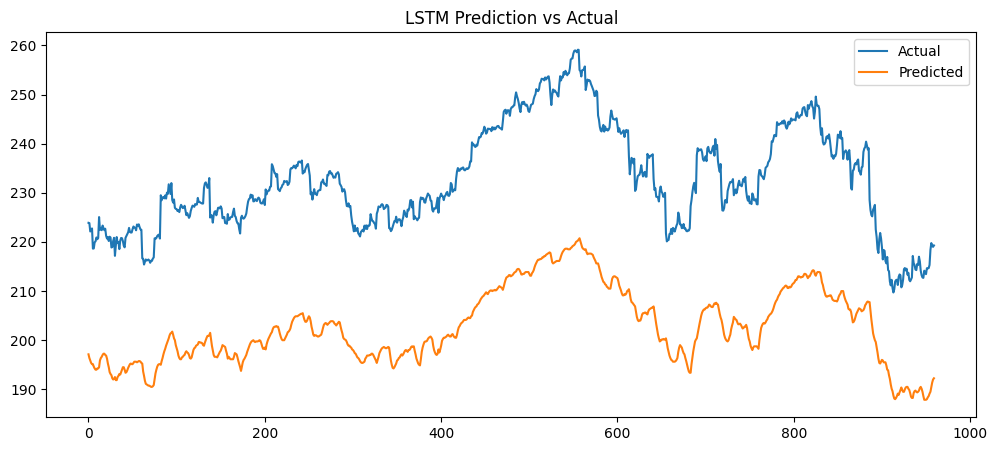

'LSTM Portfolio results saved to: AAPL_lstm_v1_2025-03-25.json'

In [96]:
# Run evaluation
lstm_results = evaluate_lstm_model(lstm_model, X_test, y_test, scaler_y, buy_threshold=0.01, sell_threshold=0.01)

# Save using naming convention
def generate_filename(stock="AAPL", model="lstm", version="v1", ext="json", use_date=True):
    date_str = datetime.now().strftime("%Y-%m-%d") if use_date else ""
    return f"{stock}_{model}_{version}{'_' + date_str if use_date else ''}.{ext}"

results_path = generate_filename(stock="AAPL", model="lstm", version="v1")
with open(results_path, "w") as f:
    json.dump({
        "model_name": lstm_results["model_name"],
        "final_value": lstm_results["final_value"],
        "profit_loss": lstm_results["profit_loss"]
    }, f, indent=2)

display(f"LSTM Portfolio results saved to: {results_path}")

In [133]:
gc.collect()
torch.cuda.empty_cache()

In [167]:
import gym
import numpy as np
from gym.spaces import Box
from datetime import datetime
import json
import pandas as pd
import matplotlib.pyplot as plt


# ===============================
# Custom Continuous Trading Environment
# ===============================
class ContinuousTradingEnv(gym.Env):
    def __init__(self, df, frame_bound=(10, 100), window_size=10, verbose=False):
        super().__init__()
        self.df = df.reset_index(drop=True)
        self.frame_bound = frame_bound
        self.window_size = window_size
        self.verbose = verbose

        self.current_step = self.frame_bound[0]
        self.max_steps = frame_bound[1] - frame_bound[0]

        self.features = [
            'Close', 'SMA_20', 'STD_20', 'Upper_Band', 'Lower_Band', 'Stoch', 'volatility',
            'OBV', 'CCI', 'ROC', 'PROC', 'Rolling_Mean_50', 'Expanding_Mean'
        ]

        self.action_space = Box(low=-1.0, high=1.0, shape=(1,), dtype=np.float32)
        self.observation_space = Box(low=0, high=1, shape=(len(self.features) + 2,), dtype=np.float32)

        self.initial_balance = 100000
        self.reset_portfolio()

    def reset_portfolio(self):
        self.portfolio_value = self.initial_balance
        self.shares_held = 0
        self.total_reward = 0

    def reset(self, seed=None, options=None):
        super().reset(seed=seed)
        self.current_step = self.frame_bound[0]
        self.reset_portfolio()
        return self._next_observation(), {}

    def _next_observation(self):
        current_data = self.df[self.features].iloc[self.current_step]
        max_vals = self.df[self.features].max()
        norm_features = current_data / max_vals.replace(0, 1)

        balance_norm = self.portfolio_value / self.initial_balance
        shares_norm = self.shares_held / 1000

        obs = np.concatenate(([balance_norm, shares_norm], norm_features.values)).astype(np.float32)
        return obs

    def step(self, action):
        terminated = self.current_step >= len(self.df) - 1
        truncated = (self.current_step - self.frame_bound[0]) >= self.max_steps
        done = terminated or truncated

        price = self.df['Close'].iloc[self.current_step]
        prev_price = self.df['Close'].iloc[max(self.current_step - 1, 0)]

        action = float(np.clip(action[0] if isinstance(action, (np.ndarray, list)) else action, -1, 1))

        trade_size = action * self.portfolio_value * 0.1
        shares = abs(trade_size) / max(price, 1e-3)
        reward = 0

        if action > 0 and self.portfolio_value >= shares * price:
            self.shares_held += shares
            self.portfolio_value -= shares * price
        elif action < 0 and self.shares_held > 0:
            shares_sold = min(shares, self.shares_held)
            self.portfolio_value += shares_sold * price
            self.shares_held -= shares_sold
            reward = (price - prev_price) * shares_sold / self.initial_balance * 100

        reward -= 0.001 * self.shares_held
        self.total_reward += reward

        info = {
            "portfolio_value": self.portfolio_value,
            "balance": self.portfolio_value,
            "position": self.shares_held,
            "price": price,
            "step": self.current_step
        }

        self.current_step += 1
        return self._next_observation(), reward, terminated, truncated, info


In [168]:
# ===============================
# Evaluation + Save Results
# ===============================
def evaluate_sac_custom(model, env, df, window_size=10):
    obs, _ = env.reset()
    done = False
    total_reward = 0
    trade_log = []

    while not done:
        action, _ = model.predict(obs, deterministic=True)
        obs, reward, terminated, truncated, info = env.step(action)
        done = terminated or truncated

        step = info.get("step")
        price = info.get("price", 1.0)
        balance = info.get("balance", 0.0)
        position = info.get("position", 0.0)

        try:
            portfolio_value = float(balance) + float(position) * float(price)
            print(f"Step {step} | Price: {price:.2f} | Balance: {balance:.2f} | Shares: {position:.2f} | PV: {portfolio_value:.2f}")
        except:
            portfolio_value = None

        trade_log.append({
            "step": step,
            "action": float(action[0]) if isinstance(action, (list, np.ndarray)) else float(action),
            "price": float(price),
            "balance": float(balance),
            "position": float(position),
            "portfolio_value": portfolio_value
        })

        total_reward += reward

    portfolio_values = [entry["portfolio_value"] for entry in trade_log if entry["portfolio_value"] is not None]
    final_value = portfolio_values[-1] if portfolio_values else 0
    profit_loss = final_value - 100000

    return {
        "portfolio_values": portfolio_values,
        "total_reward": total_reward,
        "final_value": final_value,
        "profit_loss": profit_loss,
        "actions": [entry["action"] for entry in trade_log],
        "trade_log": trade_log
    }


def generate_filename(stock="AAPL", model="sac", version="v1", ext="json", use_date=True):
    date_str = datetime.now().strftime("%Y-%m-%d") if use_date else ""
    return f"{stock}_{model}_{version}{'_' + date_str if use_date else ''}.{ext}"


def save_sac_results(df_name, results, version="v1"):
    json_path = generate_filename(df_name, "sac_portfolio", version, "json")
    csv_path = generate_filename(df_name, "sac_portfolio", version, "csv")

    with open(json_path, "w") as f:
        json.dump(results, f, indent=2)
    pd.DataFrame(results["trade_log"]).to_csv(csv_path, index=False)

    print(f"Results saved to: {json_path}")
    print(f"CSV saved to: {csv_path}")

    if results["portfolio_values"]:
        plt.plot(results["portfolio_values"])
        plt.title("SAC Portfolio Value")
        plt.xlabel("Step")
        plt.ylabel("Value ($)")
        plt.grid(True)
        plt.show()
    else:
        print("No portfolio values to plot.")


In [143]:
gc.collect()
torch.cuda.empty_cache()

In [170]:
# STEP 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')
# STEP 2: Create directory if it doesn't exist
import os
os.makedirs("/content/drive/MyDrive", exist_ok=True)


Mounted at /content/drive


In [175]:
import json
import pandas as pd

# STEP 1: Collect model results
results = {}
if 'a2c_results' in locals(): results["A2C"] = a2c_results["final_value"]
if 'ppo_results' in locals(): results["PPO"] = ppo_results["final_value"]
if 'dqn_results' in locals(): results["DQN"] = dqn_results["final_value"]
if 'sac_results' in locals(): results["SAC"] = sac_results["final_value"]
if 'td3_results' in locals(): results["TD3"] = td3_results["final_value"]
if 'ddpg_results' in locals(): results["DDPG"] = ddpg_results["final_value"]
if 'rf_results' in locals(): results["RandomForest"] = rf_results["final_value"]
if 'lgbm_results' in locals(): results["LightGBM"] = lgbm_results["final_value"]
if 'sarsa_results' in locals(): results["DeepSARSA"] = sarsa_results["final_value"]
if 'xgb_results' in locals(): results["XGBoost"] = xgb_results["final_value"]
if 'lstm_results' in locals(): results["LSTM"] = lstm_results["final_value"]

# STEP 2: Merge with per-stock results if exists
if 'results_by_stock' in locals():
    for stock, sub_results in results_by_stock.items():
        for model_name, value in sub_results.items():
            results[f"{stock}_{model_name}"] = value

# STEP 3: Save all results to JSON
with open("model_final_values.json", "w") as f:
    json.dump(results, f, indent=2)

# STEP 4: Reload for consistency
with open("model_final_values.json") as f:
    all_results = json.load(f)

# STEP 5: Define categories
discrete_keywords = ["A2C", "PPO", "DQN", "DeepSARSA"]
continuous_keywords = ["SAC", "TD3", "DDPG"]
ML_keywords = ["RandomForest", "LightGBM", "XGBoost", "LSTM"]

discrete_models = {k: v for k, v in all_results.items() if any(key in k for key in discrete_keywords)}
continuous_models = {k: v for k, v in all_results.items() if any(key in k for key in continuous_keywords)}
ml_models = {k: v for k, v in all_results.items() if any(key in k for key in ML_keywords)}

# STEP 6: Determine best models per category
best_discrete = max(discrete_models, key=discrete_models.get) if discrete_models else "N/A"
best_continuous = max(continuous_models, key=continuous_models.get) if continuous_models else "N/A"
best_ml = max(ml_models, key=ml_models.get) if ml_models else "N/A"
best_overall = max(all_results, key=all_results.get) if all_results else "N/A"

# STEP 7: Print best models
if best_discrete != "N/A":
    print(f"Best Discrete Model: {best_discrete} (${discrete_models[best_discrete]:,.2f})")
if best_continuous != "N/A":
    print(f"Best Continuous Model: {best_continuous} (${continuous_models[best_continuous]:,.2f})")
if best_ml != "N/A":
    print(f"Best Machine Learning Model: {best_ml} (${ml_models[best_ml]:,.2f})")
if best_overall != "N/A":
    print(f"Overall Best Model: {best_overall} (${all_results[best_overall]:,.2f})")

# STEP 8: Save to CSV
df_results = pd.DataFrame(list(all_results.items()), columns=["Model", "Final Portfolio Value"])
csv_path = "/content/drive/MyDrive/model_final_values.csv"
df_results.to_csv(csv_path, index=False)
print(f"Results saved as CSV: {csv_path}")


Best Discrete Model: PPO ($1,014.95)
Best Continuous Model: SAC ($3,499.31)
Best Machine Learning Model: XGBoost ($288,849.78)
Overall Best Model: XGBoost ($288,849.78)
Results saved as CSV: /content/drive/MyDrive/model_final_values.csv
